<div class="alert alert-info alertinfo" style="margin-top: 0px">
<h1>  Classification </h1>
</div>

<h1> Models in this notebook </h1>
<h3> * Logistic Regression </h3> 
<h3> * K - Nearest Neighbors (KNN) </h3> 
<h3> * Support Vector Machine (SVM) Kernel = linear </h3> 
<h3> * Support Vector Machine (SVM) Kernel = rbf </h3> 
<h3> * Support Vector Machine (SVM) Kernel = poly </h3> 
<h3> * Naive Bayes </h3> 
<h3> * Decision Tree Classification </h3> 
<h3> * Random Forest Classification </h3> 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline 
# turning off jupyter warnings
import warnings
warnings.filterwarnings('ignore')
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
from matplotlib.colors import ListedColormap

In [2]:
# From directory
df=pd.read_csv(r'C:\Users\giuse\Desktop\A-Z\Part 3 - Classification\Section 14 - Logistic Regression\Python\Social_Network_Ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [8]:
from sklearn.metrics import confusion_matrix

# Visualisation of training set

def trainplot(m,name1):
    fig1, ax = plt.subplots(figsize=(12, 4))  
    Xm_train, ym_train = sc.inverse_transform(X_train), y_train
    X1, X2 = np.meshgrid(np.arange(start = Xm_train[:, 0].min() - 10, stop = Xm_train[:, 0].max() + 10, step = 1),
                     np.arange(start = Xm_train[:, 1].min() - 1000, stop = Xm_train[:, 1].max() + 1000, step = 1))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    ax.contourf(X1, X2, m.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('darkviolet', 'aqua')))
    for i, j in enumerate(np.unique(ym_train)):
        ax.scatter(Xm_train[ym_train == j, 0], Xm_train[ym_train == j, 1], c = ListedColormap(('magenta', 'teal'))(i), label = j)
    ax.set_title(name1)
    ax.set_xlabel(f1)
    ax.set_ylabel(f2)
    ax.legend()
    fig1

def testplot(m,name2):
    fig2, ax = plt.subplots(figsize=(12, 4))  
    Xm_test, ym_test = sc.inverse_transform(X_test), y_test
    X3, X4 = np.meshgrid(np.arange(start = Xm_test[:, 0].min() - 10, stop = Xm_test[:, 0].max() + 10, step = 1),
                     np.arange(start = Xm_test[:, 1].min() - 1000, stop = Xm_test[:, 1].max() + 1000, step = 1))
    plt.xlim(X3.min(), X3.max())
    plt.ylim(X4.min(), X4.max())
    ax.contourf(X3, X4, m.predict(sc.transform(np.array([X3.ravel(), X4.ravel()]).T)).reshape(X3.shape),
             alpha = 0.75, cmap = ListedColormap(('darkviolet', 'aqua')))
    for i, j in enumerate(np.unique(ym_test)):
        ax.scatter(Xm_test[ym_test == j, 0], Xm_test[ym_test == j, 1], c = ListedColormap(('magenta', 'teal'))(i), label = j)
    ax.set_title(name2)
    ax.set_xlabel(f1)
    ax.set_ylabel(f2)
    ax.legend()
    fig2

# Defining function to draw confusion matrix
def draw_Confussion_Matrix(cf,
             group_names=['True Neg','False Pos','False Neg','True Pos'],
             categories='auto',
             count=True,
             percent=True,
             cbar=True,
             xyticks=True,
             xyplotlabels=True,
             sum_stats=True,
             figsize=None,
             cmap='Purples',
             title=None):
   
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]
    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks
    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks
    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks
    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))
        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""
    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')
    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)
    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)   
    if title:
        plt.title(title)

<div class="alert-success" style="margin-top: 0px">
<h1> Logistic Regression </h1>
</div>

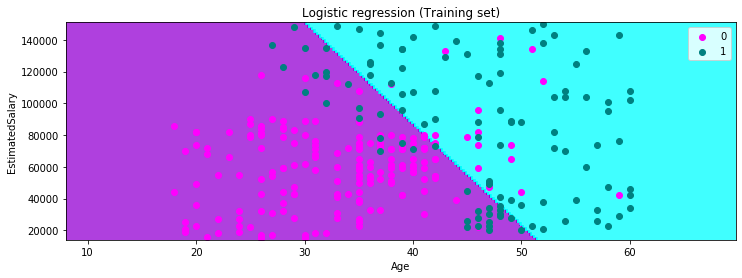

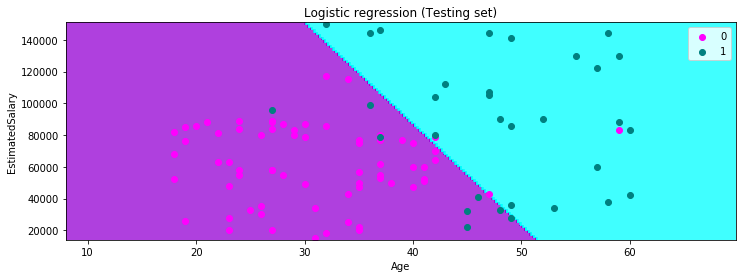

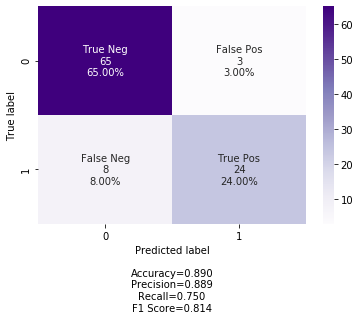

In [6]:
f1='Age'
f2='EstimatedSalary'
target='Purchased'

# Data
X = df[[f1,f2]].values
y = np.asarray(df[target])

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
 
# Scaling  
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model
from sklearn.linear_model import LogisticRegression
m = LogisticRegression(random_state = 0)
m.fit(X_train, y_train)
yhat = m.predict(X_test)

# Visualisation of testing set
name1='Logistic regression (Training set)'
name2='Logistic regression (Testing set)'
trainplot(m,name1)
testplot(m,name2)

# Model accuracy
yhat = m.predict(X_test)
cm = confusion_matrix(y_test, yhat)
draw_Confussion_Matrix(cm)

<div class="alert-success" style="margin-top: 0px">
<h1> K - Nearest Neighbors (KNN) </h1>
</div>

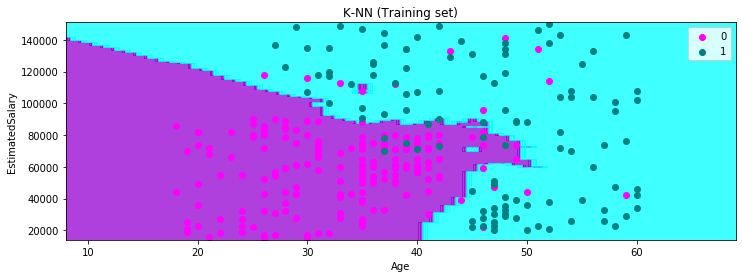

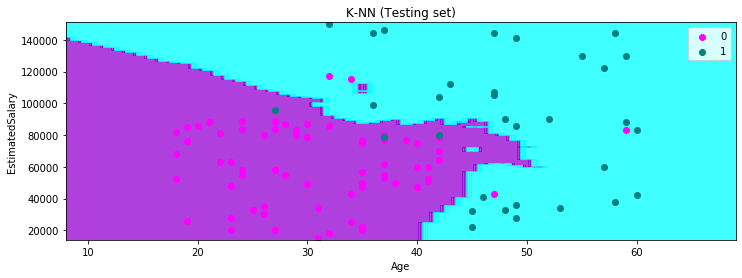

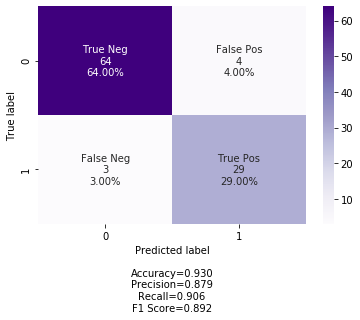

In [9]:
f1='Age'
f2='EstimatedSalary'
target='Purchased'

# Data
X = df[[f1,f2]].values
y = np.asarray(df[target])

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
 
# Scaling  
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model
from sklearn.neighbors import KNeighborsClassifier
m = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
m.fit(X_train, y_train)

# Visualisation of testing set
name1='K-NN (Training set)'
name2='K-NN (Testing set)'
trainplot(m,name1)
testplot(m,name2)

# Model accuracy
yhat = m.predict(X_test)
cm = confusion_matrix(y_test, yhat)
draw_Confussion_Matrix(cm)

<div class="alert-success" style="margin-top: 0px">
<h1> Support Vector Machine (SVM) Kernel = linear </h1>
</div>

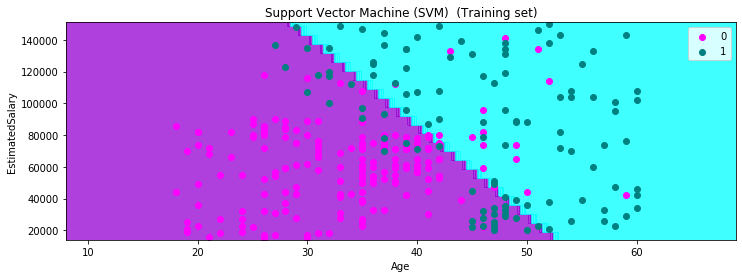

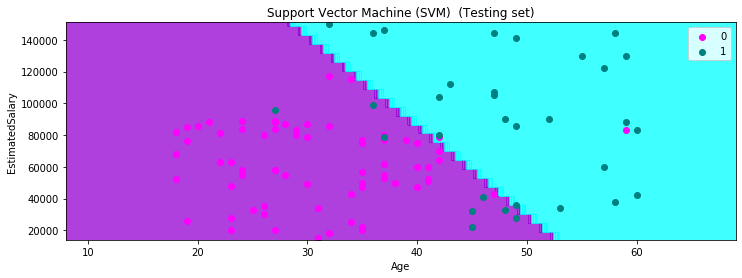

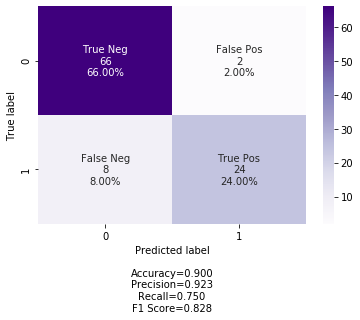

In [10]:
f1='Age'
f2='EstimatedSalary'
target='Purchased'

# Data
X = df[[f1,f2]].values
y = np.asarray(df[target])

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
 
# Scaling  
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model
from sklearn.svm import SVC
m = SVC(kernel = 'linear', random_state = 0)
m.fit(X_train, y_train)

# Visualisation of testing set
name1='SVM linear (Training set)'
name2='SVM linear (Testing set)'
trainplot(m,name1)
testplot(m,name2)

# Model accuracy
yhat = m.predict(X_test)
cm = confusion_matrix(y_test, yhat)
draw_Confussion_Matrix(cm)

<div class="alert-success" style="margin-top: 0px">
<h1> Support Vector Machine (SVM) Kernel = rbf </h1>
</div>

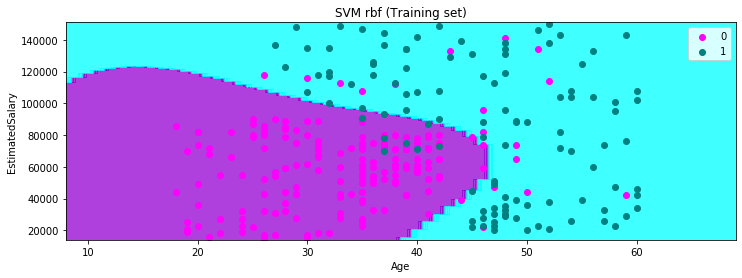

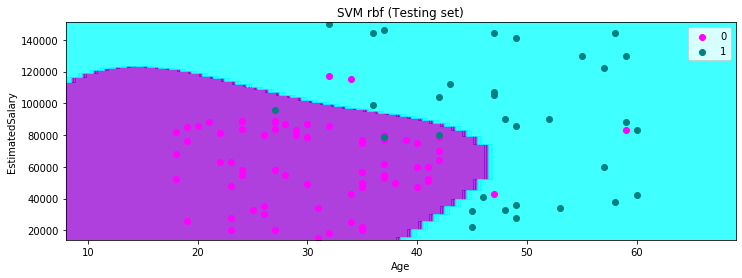

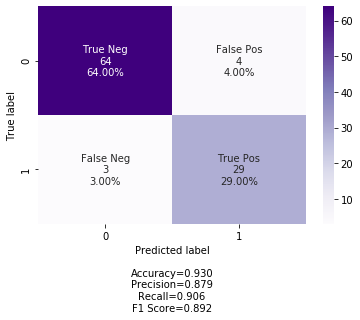

In [11]:
f1='Age'
f2='EstimatedSalary'
target='Purchased'

# Data
X = df[[f1,f2]].values
y = np.asarray(df[target])

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
 
# Scaling  
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model
from sklearn.svm import SVC
m = SVC(kernel = 'rbf', random_state = 0)
m.fit(X_train, y_train)

# Visualisation of testing set
name1='SVM rbf (Training set)'
name2='SVM rbf (Testing set)'
trainplot(m,name1)
testplot(m,name2)

# Model accuracy
yhat = m.predict(X_test)
cm = confusion_matrix(y_test, yhat)
draw_Confussion_Matrix(cm)

<div class="alert-success" style="margin-top: 0px">
<h1> Support Vector Machine (SVM) Kernel = poly </h1>
</div>

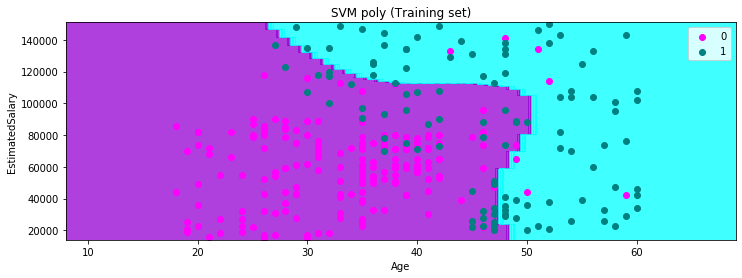

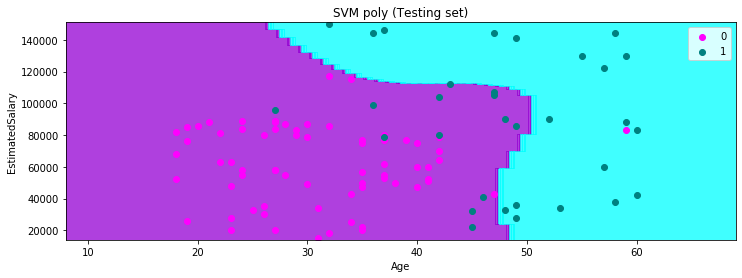

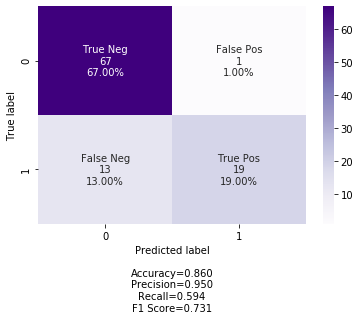

In [12]:
f1='Age'
f2='EstimatedSalary'
target='Purchased'

# Data
X = df[[f1,f2]].values
y = np.asarray(df[target])

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
 
# Scaling  
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model
from sklearn.svm import SVC
m = SVC(kernel = 'poly', random_state = 0)
m.fit(X_train, y_train)

# Visualisation of testing set
name1='SVM poly (Training set)'
name2='SVM poly (Testing set)'
trainplot(m,name1)
testplot(m,name2)

# Model accuracy
yhat = m.predict(X_test)
cm = confusion_matrix(y_test, yhat)
draw_Confussion_Matrix(cm)

<div class="alert-success" style="margin-top: 0px">
<h1> Naive Bayes </h1>
</div>

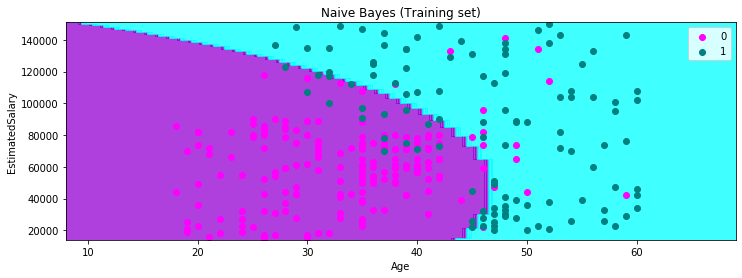

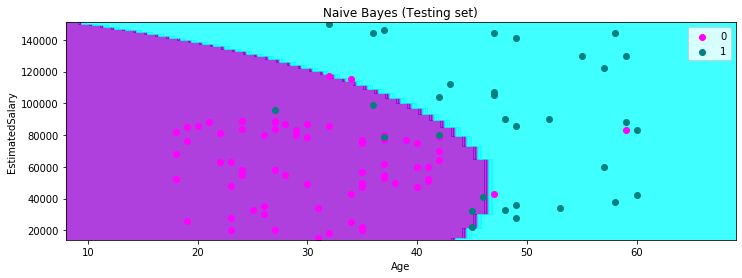

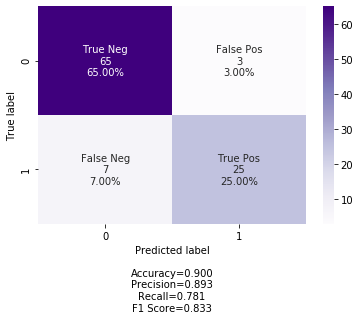

In [13]:
f1='Age'
f2='EstimatedSalary'
target='Purchased'

# Data
X = df[[f1,f2]].values
y = np.asarray(df[target])

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
 
# Scaling  
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model
from sklearn.naive_bayes import GaussianNB
m = GaussianNB()
m.fit(X_train, y_train)

# Visualisation of testing set
name1='Naive Bayes (Training set)'
name2='Naive Bayes (Testing set)'
trainplot(m,name1)
testplot(m,name2)

# Model accuracy
yhat = m.predict(X_test)
cm = confusion_matrix(y_test, yhat)
draw_Confussion_Matrix(cm)

<div class="alert-success" style="margin-top: 0px">
<h1> Decision Tree Classification </h1>
</div>

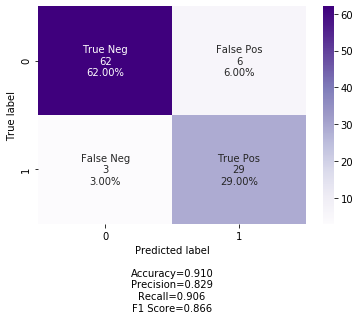

In [68]:
f1='Age'
f2='EstimatedSalary'
target='Purchased'

# Data
X = df[[f1,f2]].values
y = np.asarray(df[target])

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
 
# Scaling  
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model
from sklearn.tree import DecisionTreeClassifier
m = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
m.fit(X_train, y_train)

# Visualisation of testing set
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot
  
features = [f1,f2]
dot_data = StringIO()  
export_graphviz(m, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
Image(graph[0].create_png())

# Model accuracy
yhat = m.predict(X_test)
cm = confusion_matrix(y_test, yhat)
draw_Confussion_Matrix(cm)

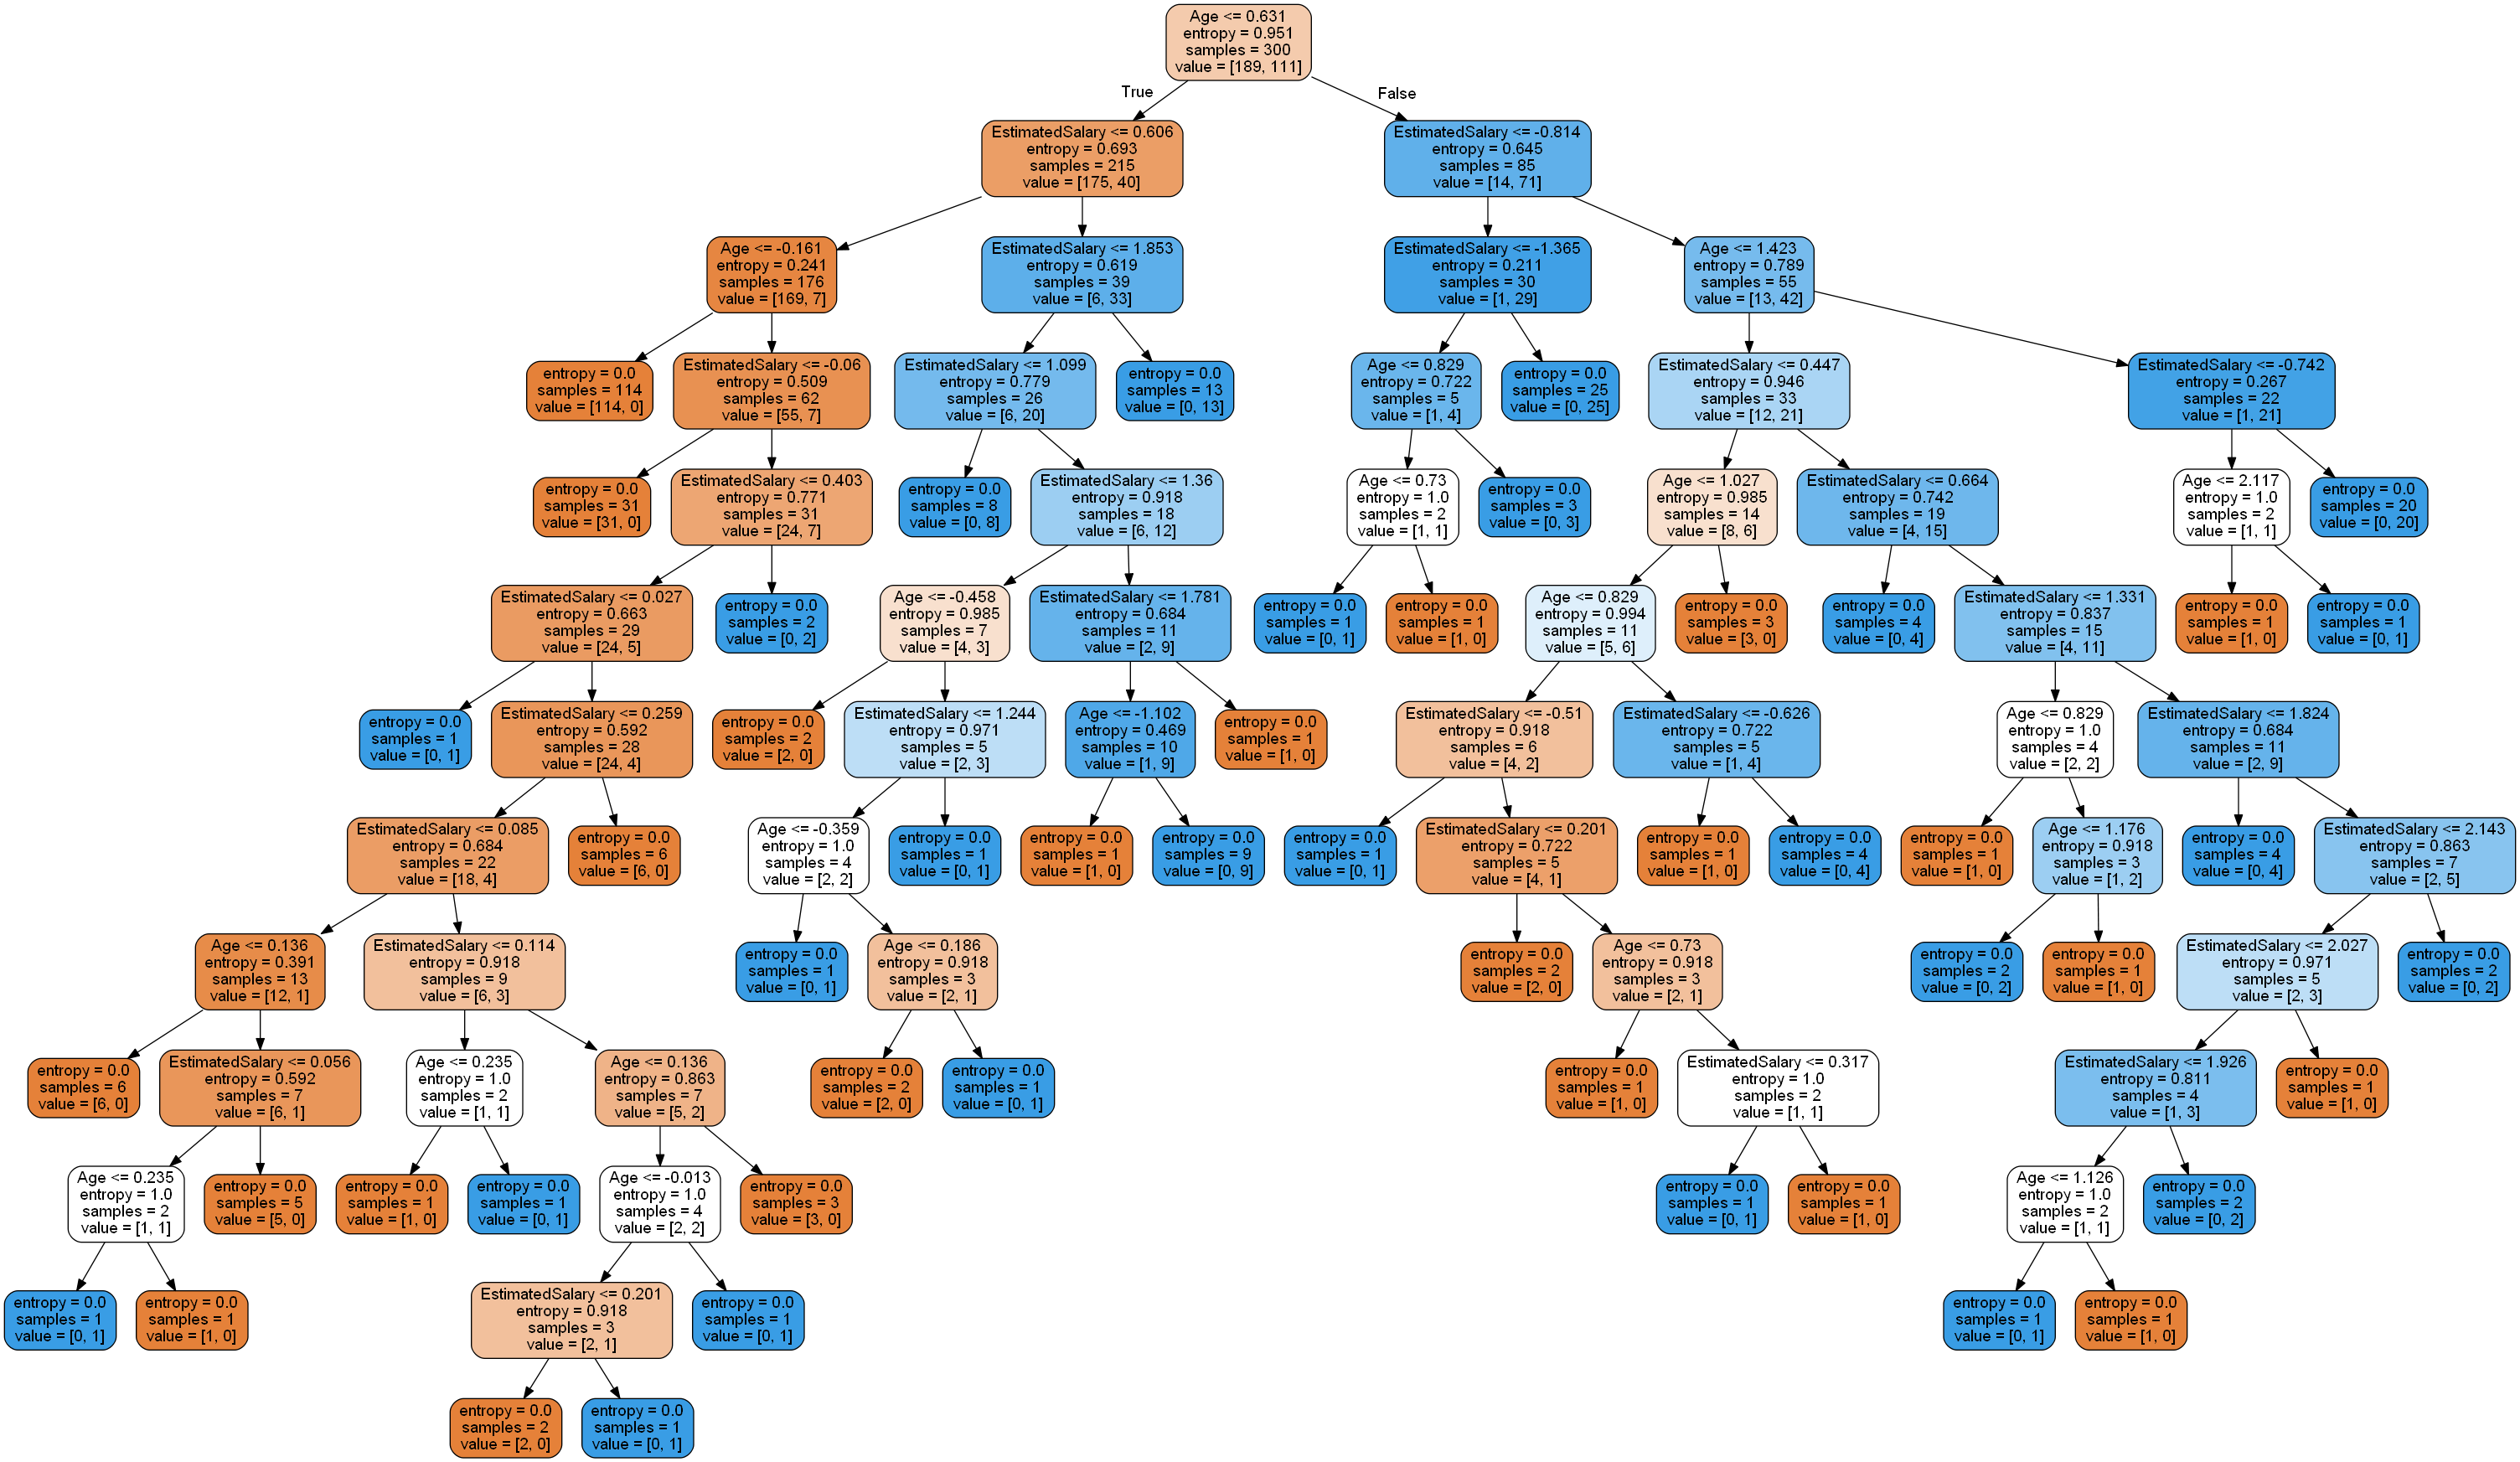

<div class="alert-success" style="margin-top: 0px">
<h1> Random Forest Classification </h1>
</div>

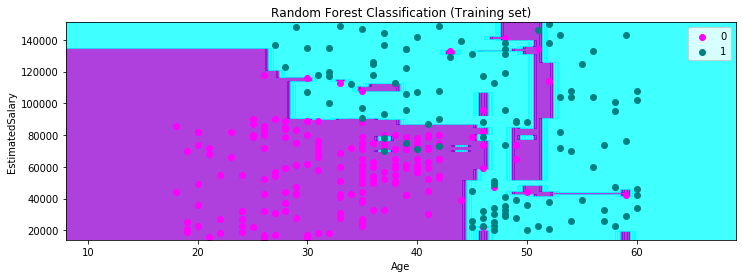

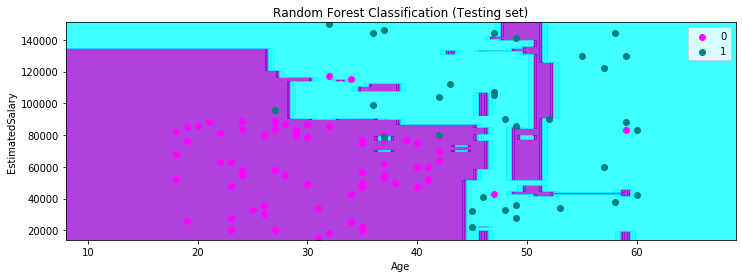

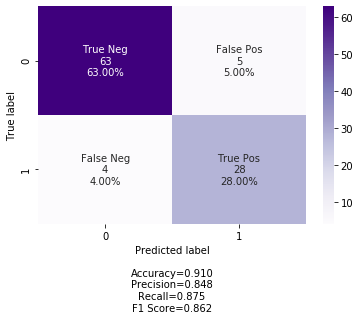

In [69]:
f1='Age'
f2='EstimatedSalary'
target='Purchased'

# Data
X = df[[f1,f2]].values
y = np.asarray(df[target])

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
 
# Scaling  
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model
from sklearn.ensemble import RandomForestClassifier
m = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
m.fit(X_train, y_train)

# Visualisation of testing set
name1='Random Forest Classification (Training set)'
name2='Random Forest Classification (Testing set)'
trainplot(m,name1)
testplot(m,name2)

# Model accuracy
yhat = m.predict(X_test)
cm = confusion_matrix(y_test, yhat)
draw_Confussion_Matrix(cm)